In [3]:
import pandas as pd

credit_df = pd.read_excel('C:\\Users\\SAMSUNG\\Documents\\vscode\\2024\\ML\\Datasets\\default_of_credit_card_clients.xls', index_col = 0)

In [4]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30001 entries, ID to 30000
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   X1      30001 non-null  object
 1   X2      30001 non-null  object
 2   X3      30001 non-null  object
 3   X4      30001 non-null  object
 4   X5      30001 non-null  object
 5   X6      30001 non-null  object
 6   X7      30001 non-null  object
 7   X8      30001 non-null  object
 8   X9      30001 non-null  object
 9   X10     30001 non-null  object
 10  X11     30001 non-null  object
 11  X12     30001 non-null  object
 12  X13     30001 non-null  object
 13  X14     30001 non-null  object
 14  X15     30001 non-null  object
 15  X16     30001 non-null  object
 16  X17     30001 non-null  object
 17  X18     30001 non-null  object
 18  X19     30001 non-null  object
 19  X20     30001 non-null  object
 20  X21     30001 non-null  object
 21  X22     30001 non-null  object
 22  X23     30001 non-null  ob

In [25]:
credit_df['Y']

1        1.0
2        1.0
3        0.0
4        0.0
5        0.0
        ... 
29996    0.0
29997    0.0
29998    1.0
29999    1.0
30000    1.0
Name: Y, Length: 30000, dtype: float32

In [26]:
credit_df.corr

<bound method DataFrame.corr of              X1   X2   X3   X4    X5   X6   X7   X8   X9  X10  ...      X15  \
1       20000.0  2.0  2.0  1.0  24.0  2.0  2.0 -1.0 -1.0 -2.0  ...      0.0   
2      120000.0  2.0  2.0  2.0  26.0 -1.0  2.0  0.0  0.0  0.0  ...   3272.0   
3       90000.0  2.0  2.0  2.0  34.0  0.0  0.0  0.0  0.0  0.0  ...  14331.0   
4       50000.0  2.0  2.0  1.0  37.0  0.0  0.0  0.0  0.0  0.0  ...  28314.0   
5       50000.0  1.0  2.0  1.0  57.0 -1.0  0.0 -1.0  0.0  0.0  ...  20940.0   
...         ...  ...  ...  ...   ...  ...  ...  ...  ...  ...  ...      ...   
29996  220000.0  1.0  3.0  1.0  39.0  0.0  0.0  0.0  0.0  0.0  ...  88004.0   
29997  150000.0  1.0  3.0  2.0  43.0 -1.0 -1.0 -1.0 -1.0  0.0  ...   8979.0   
29998   30000.0  1.0  2.0  2.0  37.0  4.0  3.0  2.0 -1.0  0.0  ...  20878.0   
29999   80000.0  1.0  3.0  1.0  41.0  1.0 -1.0  0.0  0.0  0.0  ...  52774.0   
30000   50000.0  1.0  2.0  1.0  46.0  0.0  0.0  0.0  0.0  0.0  ...  36535.0   

           X16     

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns  

<Axes: >

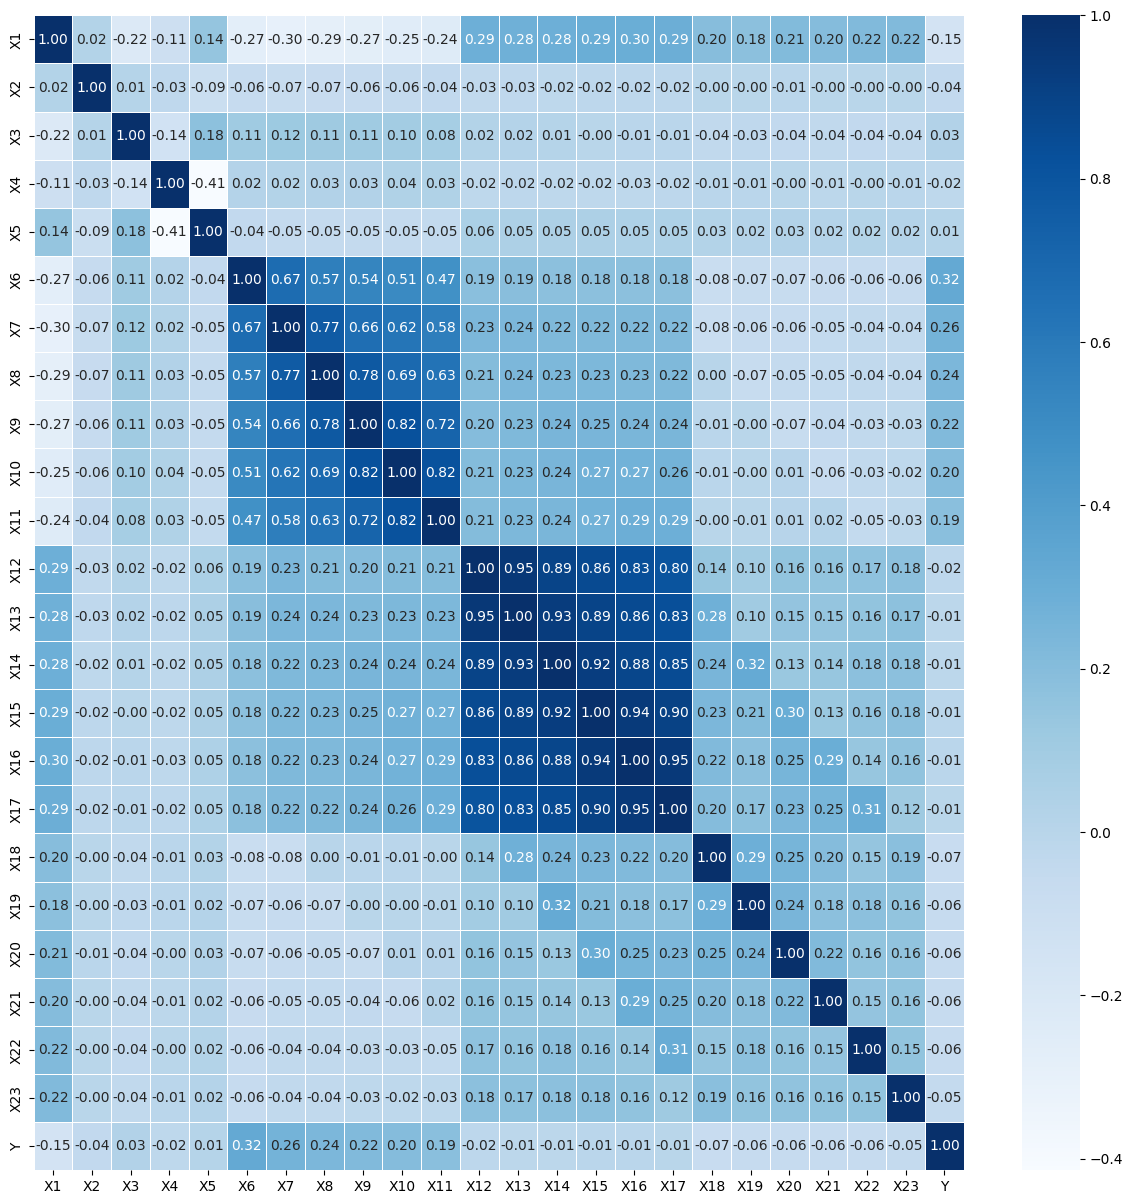

In [28]:
plt.figure(figsize=(15,15))
sns.heatmap(data = credit_df.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')

In [30]:
X = credit_df.drop('Y', axis=1)
y = credit_df['Y']

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X_scaled = StandardScaler().fit_transform(X)
X_scaled[: , 11:16]
pca = PCA(n_components=2)
pca.fit(X_scaled[: , 11:16])

bill_cols_pca = pca.transform(X_scaled[: , 11:16])

In [34]:
bill_cols_pca

array([[-1.4728633 ,  0.02477794],
       [-1.4281088 , -0.04616302],
       [-0.95911497,  0.05032954],
       ...,
       [-1.164749  , -0.30762628],
       [-0.08076125, -0.01796393],
       [-0.10776653,  0.09287705]], dtype=float32)

In [35]:
pca.fit(X_scaled[: , 5:11])

pay_cols_pca = pca.transform(X_scaled[: , 5:11])

In [36]:
pay_cols_pca

array([[-0.47747308, -3.2246437 ],
       [ 1.4616374 ,  0.85388124],
       [ 0.3933143 ,  0.1755577 ],
       ...,
       [ 3.003063  , -3.5371675 ],
       [ 0.0154234 , -0.45709082],
       [ 0.3933143 ,  0.1755577 ]], dtype=float32)

In [37]:
X_scaled_df = pd.DataFrame(X_scaled , columns=X.columns)

In [38]:

X_scaled_df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,...,-0.667993,-0.672497,-0.663059,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,...,-0.639254,-0.621636,-0.606229,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,...,-0.482408,-0.449730,-0.417188,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,...,0.032846,-0.232373,-0.186729,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,...,-0.161189,-0.346997,-0.348137,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187


In [39]:
X_scaled_df.iloc[:, :5] 

,X1,X2,X3,X4,X5
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020
1,-0.365981,0.810161,0.185828,0.858557,-1.029047
2,-0.597202,0.810161,0.185828,0.858557,-0.161156
3,-0.905498,0.810161,0.185828,-1.057295,0.164303
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029
...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248


In [40]:
X_scaled_df_drop  = pd.concat ([X_scaled_df.iloc[:, :5] , X_scaled_df.iloc[:, 16:]] ,axis=1)

In [41]:
X_scaled_df_drop

,X1,X2,X3,X4,X5,X17,X18,X19,X20,X21,X22,X23
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187
...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.404759,-1.234323,1.451114,-1.057295,0.381275,-0.384392,0.171250,0.611048,-0.012648,-0.113564,0.013131,-0.237130
29996,-0.134759,-1.234323,1.451114,0.858557,0.815221,-0.652724,-0.231032,-0.103955,0.214255,-0.299828,-0.314136,-0.293382
29997,-1.059646,-1.234323,0.185828,0.858557,0.164303,-0.327687,-0.341942,-0.256990,0.952725,-0.039964,-0.183229,-0.119001
29998,-0.674276,-1.234323,1.451114,-1.057295,0.598248,0.169130,4.844316,-0.109033,-0.229895,-0.185120,3.152536,-0.191904


In [42]:
X_scaled_df_drop[['bill_1', 'bill_2']] = bill_cols_pca

In [43]:
X_scaled_df_drop[['pay_1', 'pay_2']] = pay_cols_pca

In [44]:
X_scaled_df_drop.head()

,X1,X2,X3,X4,X5,X17,X18,X19,X20,X21,X22,X23,bill_1,bill_2,pay_1,pay_2
0,-1.136720,0.810161,0.185828,-1.057295,-1.246020,-0.652724,-0.341942,-0.227086,-0.296801,-0.308063,-0.314136,-0.293382,-1.472863,0.024778,-0.477473,-3.224644
1,-0.365981,0.810161,0.185828,0.858557,-1.029047,-0.597966,-0.341942,-0.213588,-0.240005,-0.244230,-0.314136,-0.180878,-1.428109,-0.046163,1.461637,0.853881
2,-0.597202,0.810161,0.185828,0.858557,-0.161156,-0.391630,-0.250292,-0.191887,-0.240005,-0.244230,-0.248683,-0.012122,-0.959115,0.050330,0.393314,0.175558
3,-0.905498,0.810161,0.185828,-1.057295,0.164303,-0.156579,-0.221191,-0.169361,-0.228645,-0.237846,-0.244166,-0.237130,-0.203406,0.167305,0.393314,0.175558
4,-0.905498,-1.234323,0.185828,-1.057295,2.334029,-0.331482,-0.221191,1.335034,0.271165,0.266434,-0.269039,-0.255187,-0.914308,-0.232211,-0.273289,0.847432


In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
import numpy as np
lr_clf = LogisticRegression()

result = cross_val_score(lr_clf , X_scaled_df_drop , y , scoring='accuracy')
np.mean(result)

0.8045666666666665